# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [78]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [79]:
def f(x):
    return x**2 * numpy.sin(x)
    # YOUR CODE HERE

Ensure your function works with numpy arrays:

In [80]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [9]:
def g(x):
    return (-x**2*numpy.cos(x))+(2*x*numpy.sin(x))+(2*numpy.cos(x))-2
    # YOUR CODE HERE

Check your solution with the same numpy array:

In [10]:
assert g(0) == 0.

In [11]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [12]:
def integrate_analytic(xmin, xmax):
    return ((-xmax**2*numpy.cos(xmax))+(2*xmax*numpy.sin(xmax))+(2*numpy.cos(xmax))-2)-((-xmin**2*numpy.cos(xmin))+(2*xmin*numpy.sin(xmin))+(2*numpy.cos(xmin))-2)
    # YOUR CODE HERE

Check your analytic function:

In [13]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [45]:
def integrate_numeric(xmin, xmax, N):
    delx = (xmax - xmin)/N
    return sum((delx/6*(f(xmin + i*delx)+(4*f(xmin+ (i+1/2)*delx))+(f(xmin + (i+1)*delx)))) for i in range(0,N))
    # YOUR CODE HERE

Make sure you have implemented Simpson's rule correctly:

In [46]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [47]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,"A graph to show how Fractional Error varies as the Number of Panels increases when using \n Simpson's Rule for Numerical Integration")

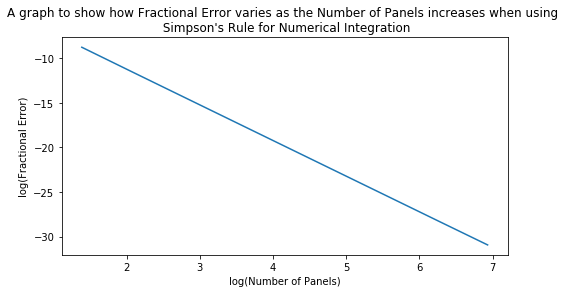

In [77]:

x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
result_numeric = numpy.array([])
for i in panel_counts:
    result = integrate_numeric(x0,x1,i) 
    result_numeric = numpy.append(result_numeric, result)
plt.figure(figsize=(8, 4))
plt.plot(numpy.log(panel_counts),(numpy.log((result_analytic - result_numeric)/result_analytic)))
plt.xlabel("log(Number of Panels)")
plt.ylabel("log(Fractional Error)")
plt.title("A graph to show how Fractional Error varies as the Number of Panels increases when using \n Simpson's Rule for Numerical Integration")

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

As the number of panels increases, the error in the numerical approximation decreases. The graph is a straight line, showing us that they have an inverse power relationship. So with lower numbers of panels, increasing the quantity will greatly reduce the error, however as the number of panels becomes greater, and larger and larger increase is required to have a significant decreasing effect on the error of the numerical approximation. 
If the number of panels becomes too large, the values used in the calculations will be too small to be stored by the computer, and therefore will be affected by rounding errors, causing the error to fluctuate randomly. Therefore the error becomes less reliable and usually greater when the number of panels becomes too large. 

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Increasing the panel count would still reduce the error of the approximation, however, because the trapezium rule uses fewer function evaluations than Simpson's Rule, the error would decrease more slowly (on a log-log graph at about half the rate of the graph above). 